# データ分析(titanic)

## データのダウンロード
- `!`を先頭につけてセルを実行すると, OSのコマンドが実行できます
- notebook上でKaggleからDL, 解凍までするとこんな感じ (pipが必要)
```shell
!pip install kaggle
!kaggle competitions download -c titanic
!unzip titanic.zip
```

## はじめに
- まずは**[`pandas`](https://pandas.pydata.org/)**を用いて, titanicデータのチェックや加工をしていきます
- このような感じで, 適宜解説を入れていきますので参考にして下さい
- わからないことや質問があったらググるかSlackで聞いて下さい
- また, 途中で`numpy`、`pandas`、`matplotlib`、`seaborn`、`scikit-learn`などのライブラリを使っています
    - `pip install`等で適当に導入して下さい
- まず, `pandas`をインポートします

In [1]:
import pandas as pd

## データ読み込み
- 落としてきたCSVファイルを読み込みます. このとき, 作業ディレクトリと同じ所にCSVを置くと楽です
- まず, `train.csv`を`pandas`の**`dataframe`**を使って読み込みます. そのあと, 読み込んだ内容を表示してみます

In [2]:
train = pd.read_csv("train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- 次に, `test.csv`を同様に`dataframe`を使って読み込み, 読み込んだ内容を表示してみます

In [3]:
test = pd.read_csv("test.csv")
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


- 各行の説明は[ここ](https://www.kaggle.com/c/titanic/data)に載っています。

|列名|説明|補足|
|:-------------|:-------------|:-----|
|Survived|生存者か| 0 = No, 1 = Yes |
|Pclass  |座席のクラス| 1st class ~ 3rd class|
|Name|名前|  |
|Sex     |性別|  |
|Age     |年齢|  |
|Sibsp|一緒に乗っていた兄弟/配偶者の数|  |
|Parch|一緒に乗っていた親/子供の数|  |
|Ticket|チケット番号||
|Fare|運賃||
|Cabin|客席番号||
|Embarked|乗船地||

- **`test`の方には`survived`がありません**が, これは**仕様**です
    - `train`のデータ(訓練データ)で学習、評価をした後, `test`のデータ(正解データ)を予測し, その精度を競うためです
    - つまり、今回のタスクでは`Survived`が**目的変数**, それ以外の`Age`,`Name`などが**説明変数**という感じです
- ちなみに, `dataframe`はこんな感じに, 平均値などの単純な統計量を簡単に出すことができます

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## データチェック

### 虫食いチェック
- まず, trainとtestをまとめて処理するために, 一度dataframeを統合します。
    - 先ほどのdescribeで, Passeng|erId<892が訓練データ(train), PassengerId>=892がテストデータ(test)らしいということがわかります

In [6]:
df=pd.concat([train,test], sort=True)
print("全データ数 (行数, 列数) は " + str(df.shape) +" です")

全データ数 (行数, 列数) は (1309, 12) です


- 一応、各列の型を調べておきます

In [7]:
df.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

- 次に, データがかけている虫食いのところ(**`NaN`がはいる**)を探します
- 虫食いのある列と, 行の個数を調べます

In [8]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

- Survivedの欠損値418個は, testにSurvivedのデータが含まれていないためです。
- まず, キャビン(客席番号)がほとんど欠損しているので削除してしまいましょう
- 乗船地を示すEmbarkedは, **最頻値**で埋めます
- 運賃を示すFare, 年齢を示すAgeは**中央値**で埋めます
    - 平均値は外れの値に引っ張られたり, 小数になると面倒なので避けます

In [9]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df.drop(columns=["Cabin"], inplace=True)
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

### 表記揺れチェック
- 乗船地を示す`Embarked`と, 性別を示す`Sex`に表記揺れが無いか調べます
- `value_counts()`を使うと, ユニークな値の個数が見れて便利です

In [10]:
df["Embarked"].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

- 今回はなさそうですが, **たまに全角半角, 大文字小文字が混じったりします**

### 文字→数字
- **文字列のままでは確率などの計算ができない**ので, 何らかの形で数値に変換する必要があります
- まず, 現時点で文字列型 (`object`) のカラムを調べます

In [12]:
df.dtypes

Age            float64
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

- とりあえず, 性別を{0,1}にわけます
    - 男性だったら1, 女性だったら0という感じにします
- また、乗船地も{0,1,2}にわけます

In [13]:
df["is_male"]=(df["Sex"]=="male").astype(int)
df.drop(columns=["Sex"],inplace=True)

emb={"S":0,"C":1,"Q":2}
df["Embarked"]=df["Embarked"].map(lambda x: emb[x])

In [14]:
df.head(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,is_male
0,22.0,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0.0,A/5 21171,1
1,38.0,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,0
2,26.0,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1.0,STON/O2. 3101282,0
3,35.0,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,0
4,35.0,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0.0,373450,1
5,28.0,2,8.4583,"Moran, Mr. James",0,6,3,0,0.0,330877,1
6,54.0,0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0.0,17463,1
7,2.0,0,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,3,0.0,349909,1
8,27.0,0,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,1.0,347742,0
9,14.0,1,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1.0,237736,0


- Ticketのところは重要じゃなさそうなので消します
- Nameのところは名前の長さと, 敬称のところだけ取ってみます
    - どうもMr.とかMrs.のところに注目するのがミソらしい...

In [15]:
df.drop(columns=["Ticket"],inplace=True)

In [16]:
# 正規表現！
df["Title"]=df["Name"].str.extract('([A-Za-z]+)\.', expand=True)
df["NameLength"]=df["Name"].map(lambda x: len(x))

In [17]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Don           1
Dona          1
Countess      1
Sir           1
Jonkheer      1
Mme           1
Capt          1
Lady          1
Name: Title, dtype: int64

- Mr, Miss, Mrs, Masterのみカテゴリわけし, あとはその他扱いにします

In [18]:
def title_xfer(title):
    titles={"Mr":1,"Miss":2,"Mrs":3,"Master":4}
    if title in titles :
        return titles[title]
    else :
        return 0
    
df["Title"]=df["Title"].map(lambda x: title_xfer(x))
df.drop(columns=["Name"],inplace=True)

In [19]:
df.head(10)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,is_male,Title,NameLength
0,22.0,0,7.2500,0,1,3,1,0.0,1,1,23
1,38.0,1,71.2833,0,2,1,1,1.0,0,3,51
2,26.0,0,7.9250,0,3,3,0,1.0,0,2,22
3,35.0,0,53.1000,0,4,1,1,1.0,0,3,44
4,35.0,0,8.0500,0,5,3,0,0.0,1,1,24
5,28.0,2,8.4583,0,6,3,0,0.0,1,1,16
6,54.0,0,51.8625,0,7,1,0,0.0,1,1,23
7,2.0,0,21.0750,1,8,3,3,0.0,1,4,30
8,27.0,0,11.1333,2,9,3,0,1.0,0,3,49
9,14.0,1,30.0708,0,10,2,1,1.0,0,3,35


- 再度確認

In [20]:
df.dtypes

Age            float64
Embarked         int64
Fare           float64
Parch            int64
PassengerId      int64
Pclass           int64
SibSp            int64
Survived       float64
is_male          int64
Title            int64
NameLength       int64
dtype: object

- 全部数字になりました

## データ加工

### 特徴量の設計
- ここで, データの大雑把な特徴を調べてみます
- まずは, 各列について相関をみてみましょう
- matplotlibとseabornを使います
    - こんな感じで, グラフとかでデータの見える化(**データビジュアライズ**)をするのが割とミソです

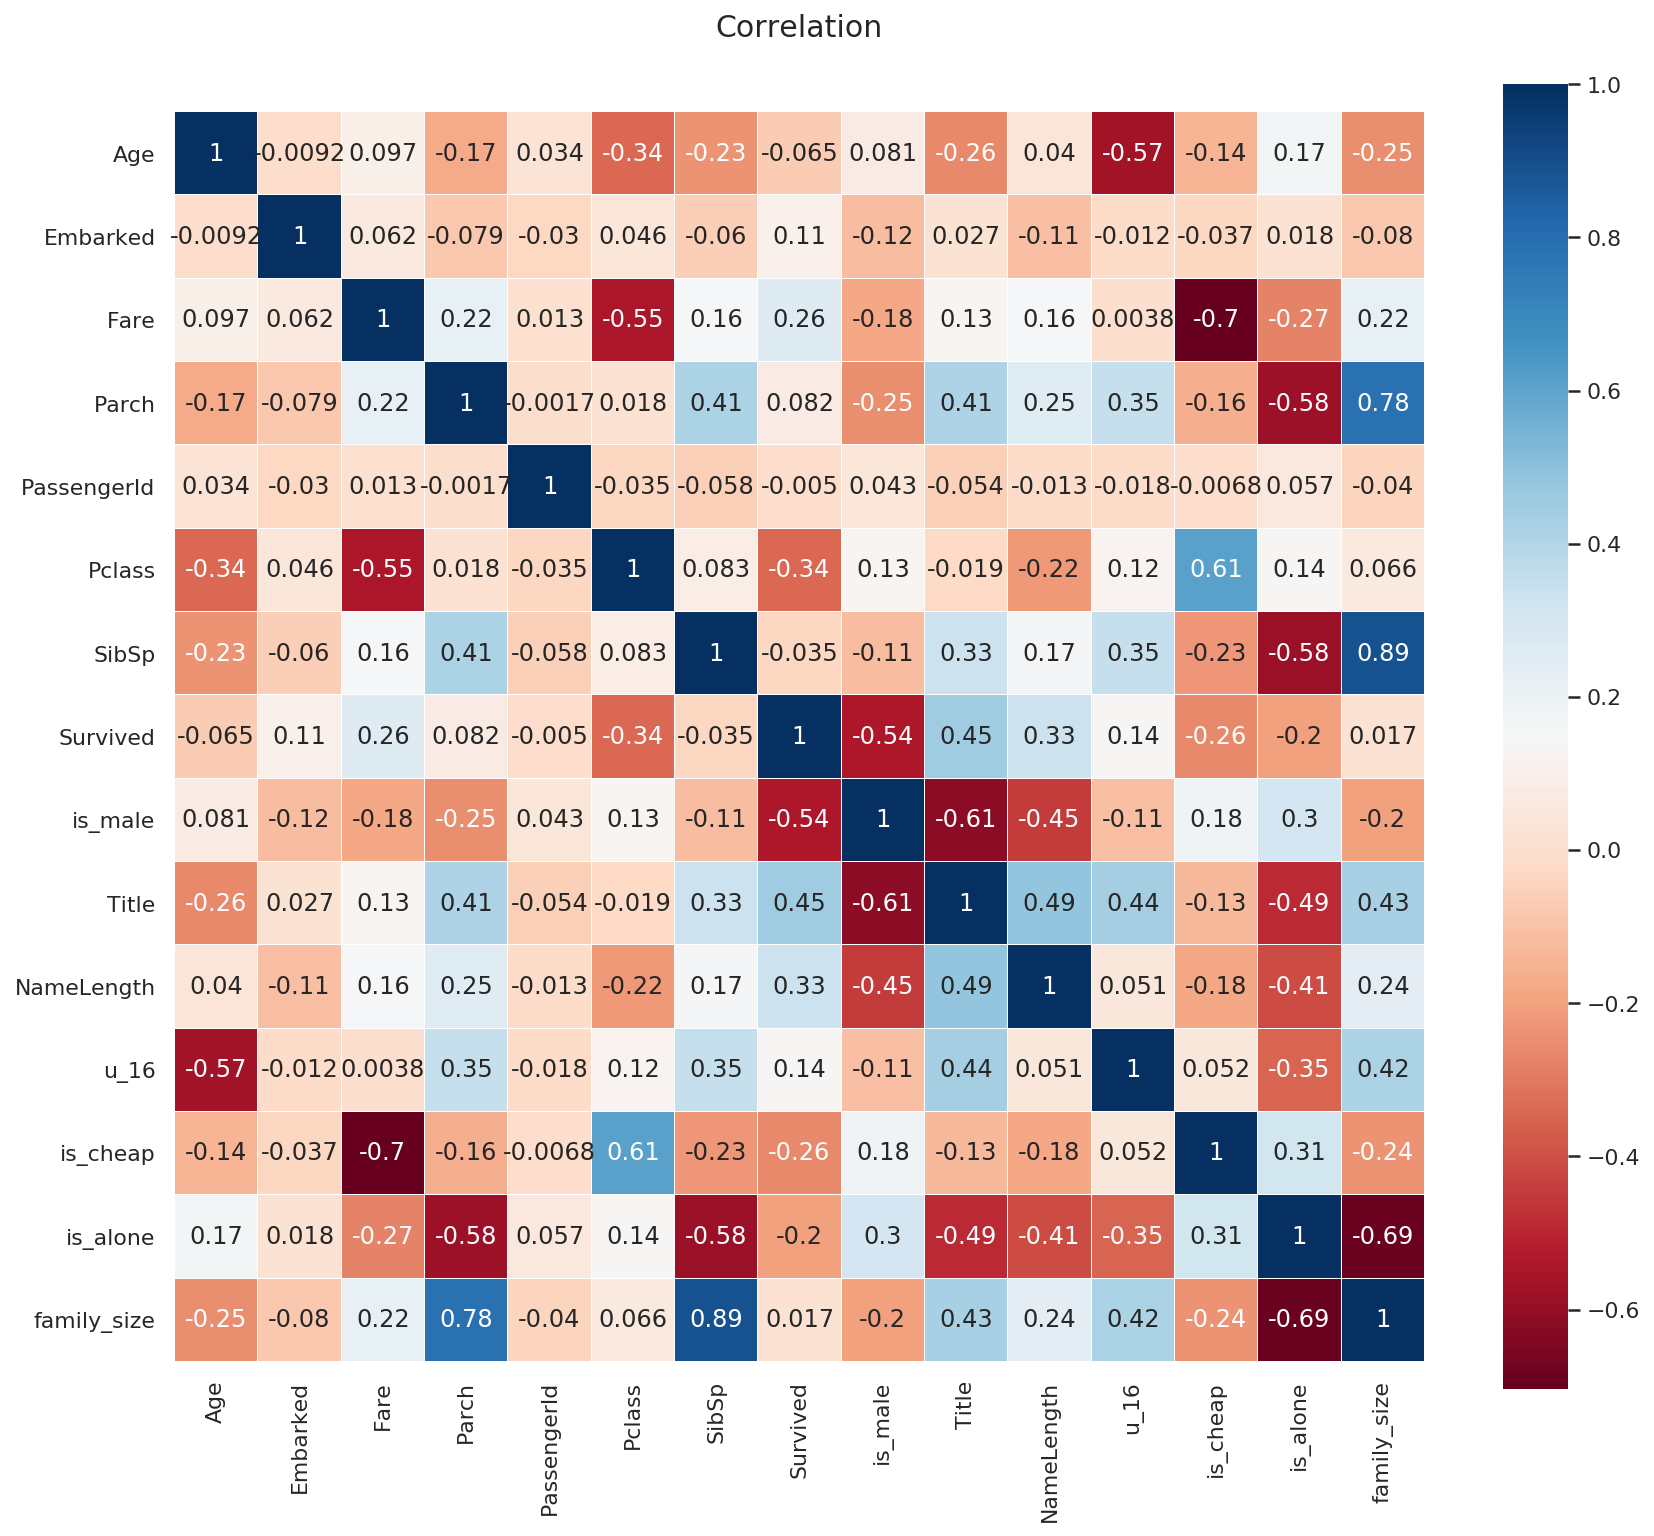

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# retina対応
%config InlineBackend.figure_formats = {'png', 'retina'}
# テーマ設定
sns.set(style="whitegrid")

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation', y=1.05, size=15)
sns.heatmap(df[df["PassengerId"]<892].astype(float).corr(), linewidths=0.1, cmap=colormap, vmax=1.0, square=True, annot=True)
plt.show()

- `Survived`と直接相関がありそうな列が3つもあります
    - `Fare`(運賃)
    - `Pclass`(座席の等級)    
    - `is_male`(性別)
    - `title`(敬称)
    - `NameLength`(名前の長さ)
- 次に, 'Survived'で色分けした各特徴量の度数分布を見てみましょう

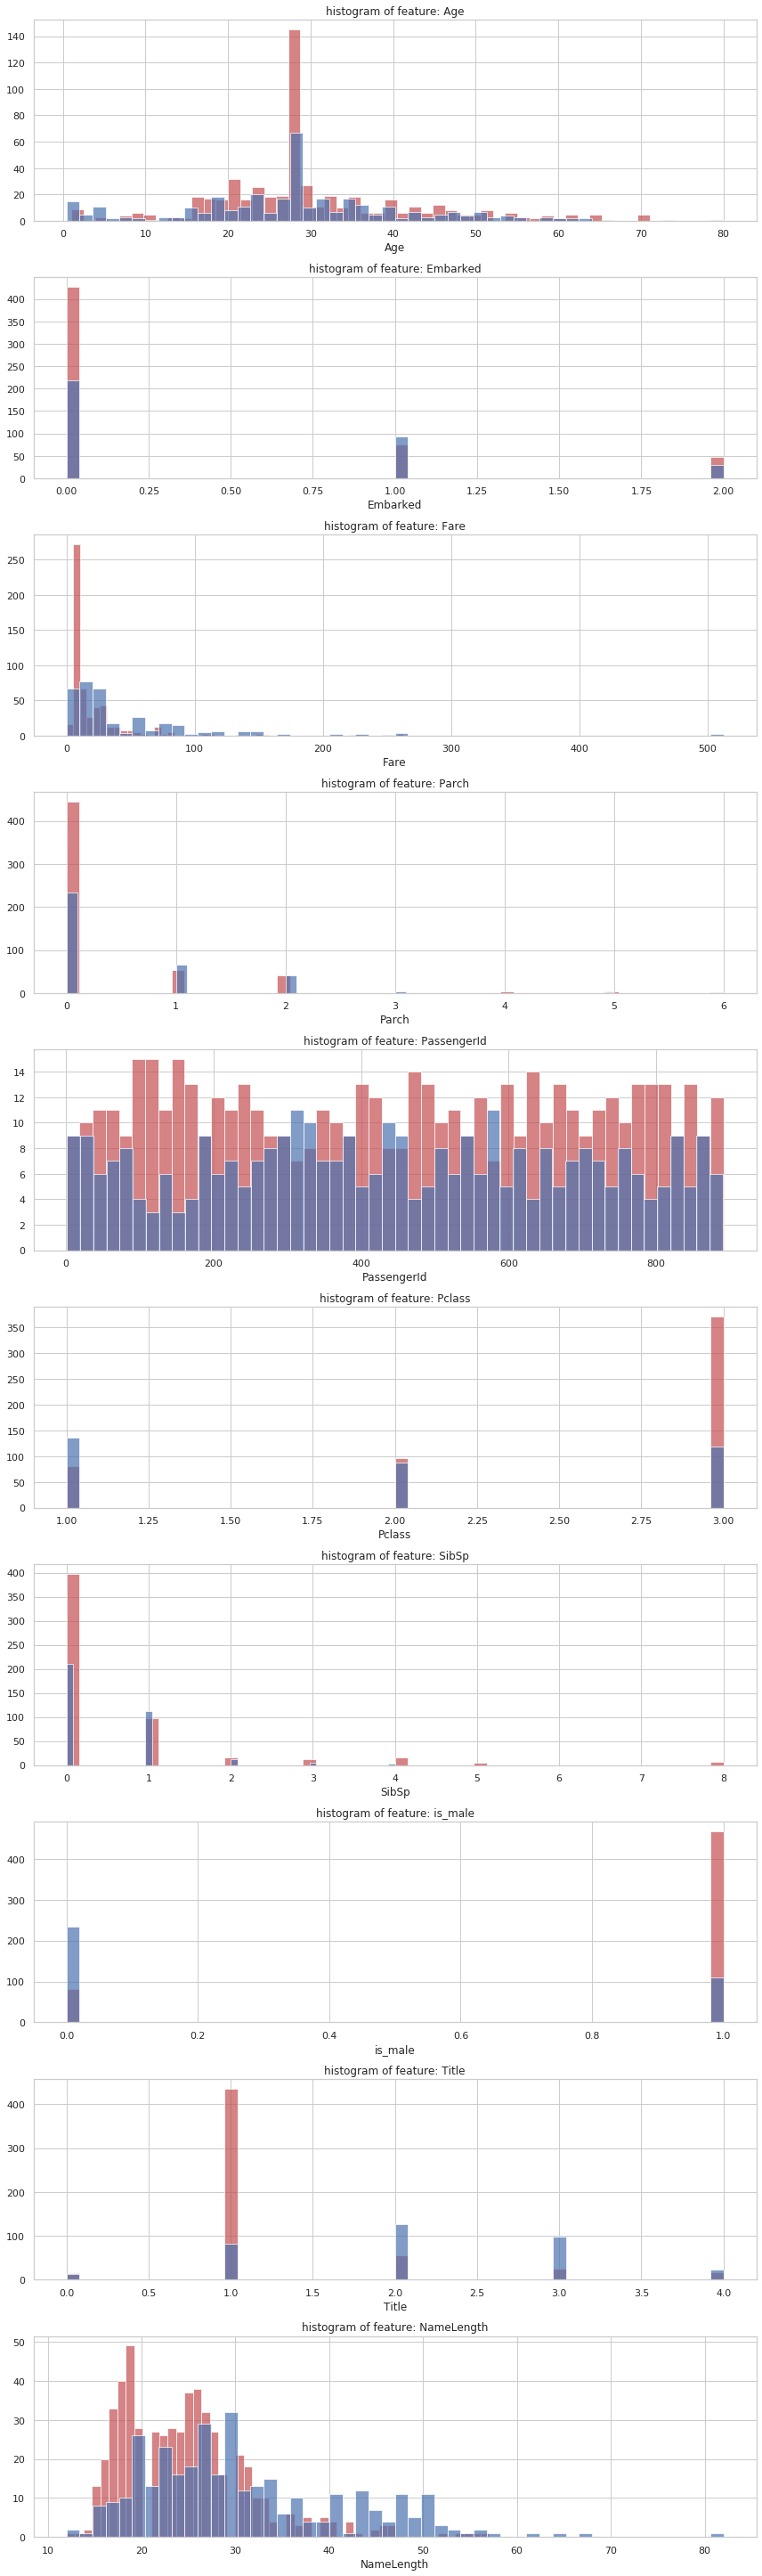

In [22]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df.drop(columns=["Survived"])):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df["Survived"]==0], bins=50, color="r", hist_kws = {"alpha" : 0.7}, kde=False)
    sns.distplot(df[cn][df["Survived"]==1], bins=50, color="b", hist_kws = {"alpha" : 0.7}, kde=False)
    ax.set_title('histogram of feature: ' + str(cn))
    plt.tight_layout()
plt.show()

- 青が生存者, 赤が死んじゃった人です
- 気づいたこと
    - **子供の生存率(Age<17くらい?)**が高い
    - **運賃が安い客(Fare<40くらい?)**はだいぶ見捨てられいる
    - **sibspもparchも, 1以上だと**だいぶ生存率が高い
- 裏付け

In [23]:
df[df["Age"]<16]["Survived"].mean()

0.5903614457831325

In [24]:
df[df["Age"]>=17]["Survived"].mean()

0.36283185840707965

In [25]:
df[df["Fare"]<40]["Survived"].mean()

0.3202797202797203

In [26]:
df[df["Fare"]>=40]["Survived"].mean()

0.6420454545454546

In [27]:
df[(df["SibSp"]==0)&(df["Parch"]==0)]["Survived"].mean()

0.30353817504655495

In [28]:
df[(df["SibSp"]!=0)|(df["Parch"]!=0)]["Survived"].mean()

0.5056497175141242

### 特徴量の追加
- 上で得られた知見をもとに, 特徴量を追加する

In [29]:
# 16才以下なら1
df["u_16"]=0
df.loc[df["Age"]<16,"u_16"]=1

# 運賃が40以下なら1
df["is_cheap"]=0
df.loc[df["Fare"]<40,"is_cheap"]=1

# 家族がいなかったら1
df["is_alone"]=0
df.loc[(df["SibSp"]==0)&(df["Parch"]==0),"is_alone"]=1

df["family_size"]=df["SibSp"]+df["Parch"]+1

In [30]:
df.head(10)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,is_male,Title,NameLength,u_16,is_cheap,is_alone,family_size
0,22.0,0,7.2500,0,1,3,1,0.0,1,1,23,0,1,0,2
1,38.0,1,71.2833,0,2,1,1,1.0,0,3,51,0,0,0,2
2,26.0,0,7.9250,0,3,3,0,1.0,0,2,22,0,1,1,1
3,35.0,0,53.1000,0,4,1,1,1.0,0,3,44,0,0,0,2
4,35.0,0,8.0500,0,5,3,0,0.0,1,1,24,0,1,1,1
5,28.0,2,8.4583,0,6,3,0,0.0,1,1,16,0,1,1,1
6,54.0,0,51.8625,0,7,1,0,0.0,1,1,23,0,0,1,1
7,2.0,0,21.0750,1,8,3,3,0.0,1,4,30,1,1,0,5
8,27.0,0,11.1333,2,9,3,0,1.0,0,3,49,0,1,0,3
9,14.0,1,30.0708,0,10,2,1,1.0,0,3,35,1,1,0,2


## 予測

### モデル構築・学習
- まず、trainデータとtestデータに戻す

In [31]:
train = df[df["PassengerId"] < 892]
test = df[df["PassengerId"] >= 892].drop(columns="Survived")

In [32]:
train.shape

(891, 15)

In [33]:
test.shape

(418, 14)

- 学習モデルの構築
    - 答えがわかっているデータを学習し, 答えがないデータを予測するのは**教師あり学習**です
    - 今回は、**random forest**と呼ばれるアルゴリズムを用いる
    - `scikit-learn`を使う

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=100)

- 学習の前準備
- 今回, モデルの評価のため, 訓練データをさらに訓練データとテストデータに分けます
    - PassengerId=600で、ほぼ訓練:テスト=2:1に分ける
- 訓練データ
    - 問題と答えにわけて渡す必要がある
    - 問題を`train_X`, 答えを`train_y`とする
    - 答えとなるデータは, 生存したかしてないかの`Survived`である。
- テストデータ
    - 問題を`test_X`として渡す
    - `test_y`は評価に取っておく
- 原則として, xは行列であるが, yは1列のベクトルであることが通例なので小文字で示す

In [35]:
# numpyの配列に変換して渡す
import numpy as np

train_X = np.array(train[train["PassengerId"]<=600].drop(columns=["Survived"]))
train_y = np.array(train[train["PassengerId"]<=600]["Survived"])

test_X = np.array(train[train["PassengerId"]>600].drop(columns=["Survived"]))
test_y = np.array(train[train["PassengerId"]>600]["Survived"])

- いざ学習
- 次の2ステップ
    - 教師データ(train)で**学習**する
        - fit
    - テストデータ(test)を**予測**する
        - predict

In [36]:
rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

## モデルの評価

### テストデータで評価
- 正解率を単純に出してみる

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_y,test_y)

0.8487972508591065

- モデルのパラメータを変えてみる

In [38]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=100)

rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

accuracy_score(pred_y,test_y)

0.8419243986254296

In [39]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100)

rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

accuracy_score(pred_y,test_y)

0.8556701030927835

In [40]:
rfc = RandomForestClassifier(n_estimators=70, max_depth=10, random_state=100)

rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

accuracy_score(pred_y,test_y)

0.8556701030927835

### 学習アルゴリズムも変えてみる
- 今流行りの**XGboost**というアルゴリズムを使ってみます
- [参考](https://xgboost.readthedocs.io/en/latest/index.html)

In [41]:
from xgboost import XGBClassifier

xgc = XGBClassifier(n_estimators=1000, max_depth=10, random_state=100, eta=0.5)

xgc.fit(train_X,train_y)
pred_y = xgc.predict(test_X)

accuracy_score(pred_y,test_y)

0.845360824742268

### クロスバリデーションのデモ
- scikit-learn


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
xgc = XGBClassifier(n_estimators=500, random_state=2424, eta=0.5)

scores = cross_val_score(xgc, train_X, train_y, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.09)


In [44]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=110)

scores = cross_val_score(rfc, train_X, train_y, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.04)


- こちらは**lightgbm**というモデル
- かなり高速な割に精度が出やすいモデルです。

In [45]:
import lightgbm as lgb

gbm = lgb.LGBMClassifier(objective='binary',
                        num_leaves = 31,
                        learning_rate=0.1,
                        min_child_samples=10,
                        n_estimators=100)

scores = cross_val_score(gbm, train_X, train_y, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.12)


## モデルの提出
- 最後に, trainデータを全部学習させ, testデータの予測をKaggleに提出します
- 一番正解率の高かったRandom Forestのモデルを採用します

In [46]:
train_X = np.array(train.drop(columns=["Survived"]))
train_y = np.array(train["Survived"])

test_X = np.array(test.sort_values("PassengerId"))

In [47]:
rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

## 予測結果

In [48]:
pred_y

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [49]:
ans = test.sort_values("PassengerId").loc[:,["PassengerId"]]
ans["Survived"] = pd.Series(pred_y).astype(int)

In [50]:
ans.to_csv("submit.csv",index=None)

## さらなる精度向上のためにやれること
- 他の学習アルゴリズムを試す
- 特徴量の追加, 表現方法の工夫
    - one-hot表現
- ハイパーパラメータのチューニング
    - RandomForestの木の本数とか, 木の深さなど
- 予測結果に対して考察
    - 「間違って予測してしまったデータ」に傾向がないか?
- etc...

- ぜひ色々試してみて下さい